In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn import datasets

iris_data = datasets.load_iris()
iris_df = pd.DataFrame(iris_data["data"], columns=iris_data["feature_names"])
iris_df["class"] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 1. Data Analysis

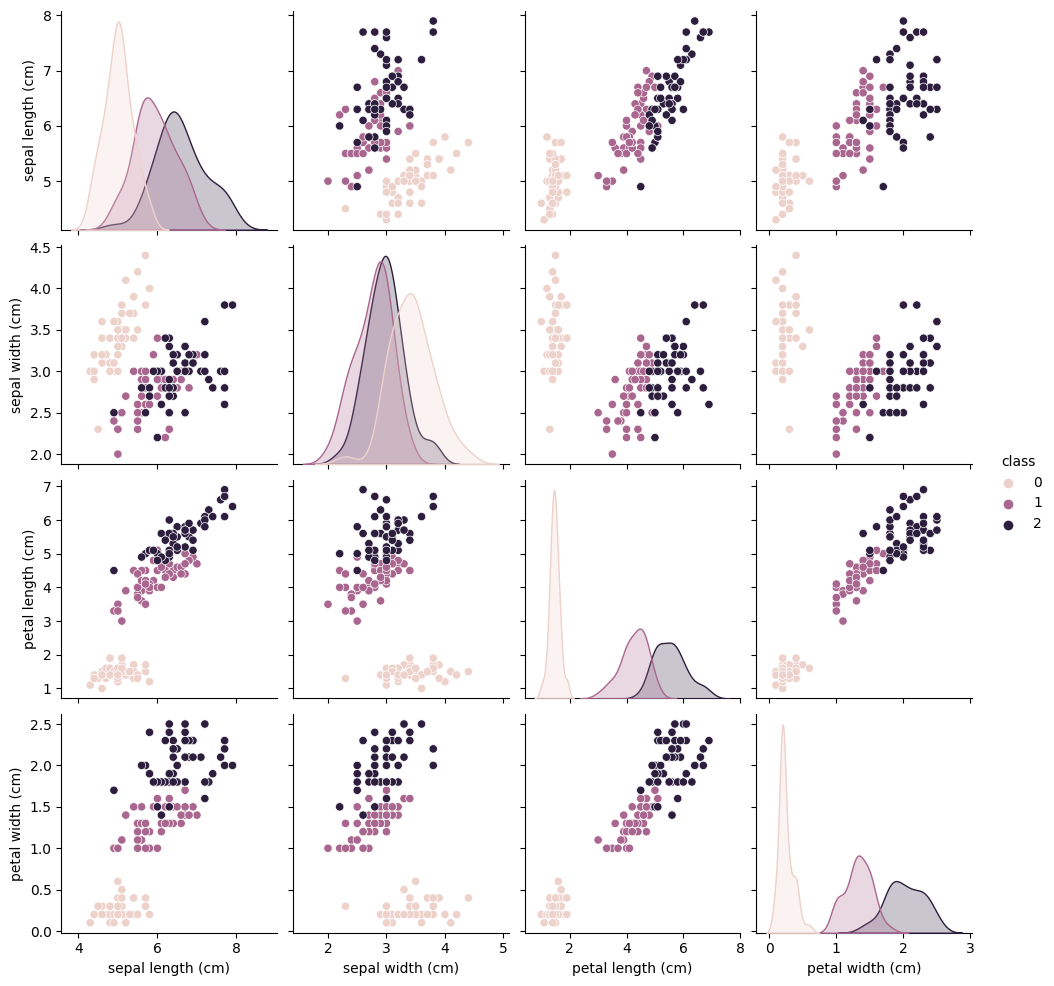

In [84]:
sns.pairplot(iris_df, hue="class")

### 2. Feature Engineering

### 3. Train

In [94]:
X = iris_df.iloc[:, 3:4].values
y = iris_df.iloc[:,-1].values

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('LR_model', LogisticRegression(multi_class='multinomial'))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR_model', LogisticRegression(multi_class='multinomial'))])

In [97]:
pipe.classes_

array([0, 1, 2])

### 4. Evaluation

In [98]:
y_predict = pipe.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, auc, roc_curve

In [100]:
confusion_matrix(y_test, y_predict)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [101]:
accuracy_score(y_test, y_predict)

1.0

In [93]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.78      0.54      0.64        13
           2       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45



In [73]:
fpr, tpr, _ = roc_curve(y_test, y_predict)

In [74]:
auc(fpr, tpr)

0.8611111111111112